In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [12]:
probabilities = nd.ones(6) / 6
rolls = nd.random.multinomial(probabilities, shape=(1000))

### The process of throwing dices    
<big>
On one hand, we know that when I throw one dice, there are $\frac{1}{6}$ that I would get one specific number, say, 4.  
If we throw $N$ times of dices, and we count how many times we got a 4, $N_{got 4}$. Then we can also say that the probability we got a 4 is:  
    $$P(number = 4) = \frac{N_{got 4}}{N}$$
So let's simulate the process of throwing dices and find the cumulative count of the presence of each number. The purpose of this short program is to show you how probability works (how we got a 1/6).

In [19]:
probabilities = [1/6.] * 6
probabilities

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

#### It landed one time on 2

In [8]:
np.random.multinomial(1, probabilities, size = None)

array([0, 1, 0, 0, 0, 0])

#### Total 20 times. Threw 3 times on 1, 5 times on 2, 5 times on 3, e.t.c

In [9]:
np.random.multinomial(20, [1/6.]*6, size=1)

array([[3, 5, 5, 2, 4, 1]])

In [31]:
rolls = np.random.multinomial(1, probabilities, size=1000)
counts = np.zeros((6,1000))
totals = np.zeros(6)
for i, roll in enumerate(rolls):
    totals[np.where(roll == 1)[0]] += 1
    counts[:, i] = totals

In [32]:
totals / 1000

array([0.171, 0.158, 0.163, 0.165, 0.185, 0.158])

In [33]:
counts

array([[  0.,   0.,   0., ..., 171., 171., 171.],
       [  1.,   2.,   2., ..., 157., 158., 158.],
       [  0.,   0.,   0., ..., 163., 163., 163.],
       [  0.,   0.,   0., ..., 165., 165., 165.],
       [  0.,   0.,   1., ..., 185., 185., 185.],
       [  0.,   0.,   0., ..., 157., 157., 158.]])

#### Normalizing by the number of tosses, we get the probabilities for each run.

In [34]:
x = np.arange(1000).reshape((1,1000)) + 1
estimates = counts / x
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])

[0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0.13861386 0.16831683 0.14851485 0.14851485 0.22772277 0.16831683]


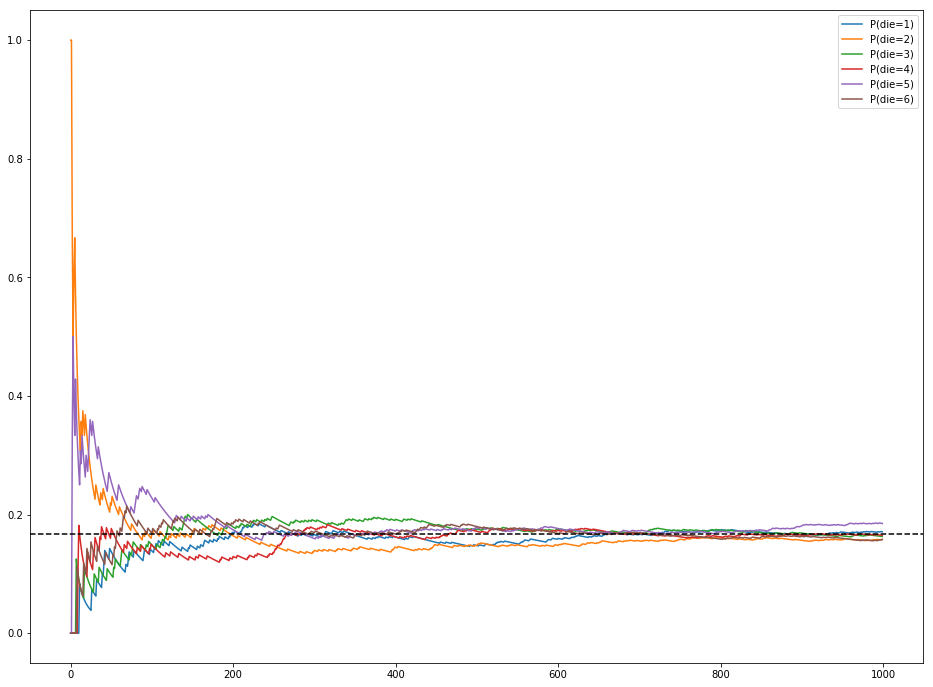

In [37]:
plt.figure(figsize=(16, 12))
for i in range(6):
    plt.plot(estimates[i, :], label=("P(die=" + str(i+1) +")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()   
plt.show()